# CHSH Game: Quantum vs Classical Strategies

## Introduction

The CHSH (Clauser-Horne-Shimony-Holt) game is a famous example that demonstrates **quantum advantage** over classical strategies. It proves that quantum mechanics allows correlations that cannot be achieved through classical physics alone.

### The Game Rules

Two players, Alice and Bob, are in separate locations and cannot communicate during the game:

1. **Questions**: A referee randomly asks Alice a question x ∈ {0,1} and Bob a question y ∈ {0,1}
2. **Answers**: Alice responds with a ∈ {0,1} and Bob with b ∈ {0,1}
3. **Win Condition**: They win if **a ⊕ b = x ∧ y**

Where:
- ⊕ is XOR (exclusive OR)
- ∧ is AND (logical AND)

### Why This Matters

- **Classical limit**: The best classical strategy wins 75% of the time
- **Quantum advantage**: Using entanglement, quantum strategies can win ~85.4% of the time
- **Bell's inequality**: This violates Bell's inequality, proving quantum mechanics is fundamentally different from classical physics

## Understanding the Win Condition

The game is won when: **a ⊕ b = x ∧ y**

Let's break this down:

| x | y | x ∧ y | Required: a ⊕ b |
|---|---|-------|-----------------|
| 0 | 0 | 0     | 0 (a = b)       |
| 0 | 1 | 0     | 0 (a = b)       |
| 1 | 0 | 0     | 0 (a = b)       |
| 1 | 1 | 1     | 1 (a ≠ b)       |

**Observation**: 
- In 3 out of 4 cases (75%), Alice and Bob need to give the **same answer** (a = b)
- In 1 out of 4 cases (25%), they need to give **different answers** (a ≠ b)

This creates a fundamental tension in classical strategies!

## Classical Approach

### Strategy

Since 75% of cases require a = b, the optimal classical strategy is:
- **Pre-agree**: Alice and Bob both always answer the same value (both 0 or both 1)
- This guarantees winning when x∧y = 0 (3 out of 4 cases)
- But it guarantees losing when x∧y = 1 (the remaining case)

**Expected win rate: 75%**

This is provably the best any classical strategy can achieve! Let's verify this with simulation.

In [46]:
import random
import pandas as pd 
import numpy as np

# Simulate classical CHSH game with optimal strategy
n_sim = 10000
results = []

# Classical strategy: Both players always answer 0 (or both always answer 1)
classical_answer = 0  # They pre-agree to always say 0

for i in range(n_sim):
    # Referee randomly chooses questions
    x = random.randint(0, 1)
    y = random.randint(0, 1)
    
    # Alice and Bob use their pre-agreed strategy
    a = classical_answer
    b = classical_answer
    
    # Check win condition: a ⊕ b == x ∧ y
    xy_result = x * y  # x AND y
    ab_xor = a ^ b     # a XOR b
    is_win = (ab_xor == xy_result)
    
    results.append({
        'x': x,
        'y': y,
        'a': a,
        'b': b,
        'x_and_y': xy_result,
        'a_xor_b': ab_xor,
        'win': is_win
    })

result_df = pd.DataFrame(results)
classical_win_rate = result_df['win'].mean()

print(f"Classical CHSH Game Results ({n_sim} simulations)")
print(f"{'='*60}")
print(f"Strategy: Both players always answer {classical_answer}")
print(f"Win rate: {classical_win_rate:.2%}")
print(f"\nBreakdown by question pair:")
print(result_df.groupby(['x', 'y']).agg(
    count=('win', 'count'),
    win_rate=('win', 'mean')
))

Classical CHSH Game Results (10000 simulations)
Strategy: Both players always answer 0
Win rate: 75.65%

Breakdown by question pair:
     count  win_rate
x y                 
0 0   2464       1.0
  1   2586       1.0
1 0   2515       1.0
  1   2435       0.0


### Analysis

As expected, the classical strategy wins exactly **75%** of the time:
- Wins when (x, y) ∈ {(0,0), (0,1), (1,0)} → 3/4 cases
- Loses when (x, y) = (1,1) → 1/4 cases

**Can we do better?** Classical physics says no. But quantum mechanics says yes!

## Quantum Approach

### The Quantum Strategy

Alice and Bob can beat the 75% limit using **quantum entanglement**!

**Key idea**: 
1. Before the game, Alice and Bob share an entangled Bell pair
2. When they receive their questions, they perform specific measurements on their qubits
3. The measurement angles are carefully chosen to maximize correlation

**Optimal measurement bases**:
- If x = 0: Alice measures in **Z basis** (θ = 0°)
- If x = 1: Alice measures in **rotated basis** (θ = 90°, RY(π/2))
- If y = 0: Bob measures in **rotated basis** (θ = 45°, RY(π/4))
- If y = 1: Bob measures in **rotated basis** (θ = -45°, RY(−π/4))

With this strategy using Y-axis rotations, the quantum win rate is: **cos²(π/8) ≈ 85.36%**

This violates Bell's inequality and proves quantum mechanics allows stronger correlations than classical physics!

### Step 1: Create the Shared Entangled State

Alice and Bob share a Bell state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2

This entangled state is the key to achieving quantum advantage.

Bell Pair Circuit (Alice: qubit 0, Bob: qubit 1)


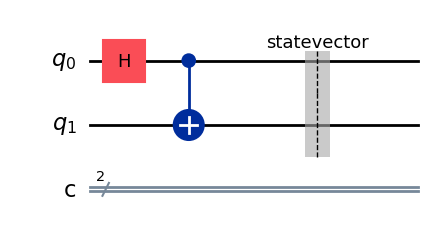


Bell State |Φ⁺⟩:


<IPython.core.display.Latex object>

In [47]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *
import numpy as np

# Create Bell state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
def create_bell_pair():
    """Create a Bell state shared between Alice (qubit 0) and Bob (qubit 1)"""
    qc = QuantumCircuit(2, 2)
    
    # Create Bell state |Φ⁺⟩
    qc.h(0)        # Apply Hadamard to first qubit
    qc.cx(0, 1)    # Apply CNOT to create entanglement
    
    return qc

# Create and visualize the Bell pair
bell_circuit = create_bell_pair()
bell_circuit.save_statevector()

print("Bell Pair Circuit (Alice: qubit 0, Bob: qubit 1)")
print("="*60)
display(bell_circuit.draw('mpl'))

# Verify the state
simulator = AerSimulator(method='statevector')
result = simulator.run(transpile(bell_circuit, simulator)).result()
statevector = result.get_statevector()

print("\nBell State |Φ⁺⟩:")
from qiskit.visualization import array_to_latex
display(array_to_latex(statevector, prefix="|\\Phi^+\\rangle = "))

### Step 2: Define the Quantum Strategy

Alice and Bob measure their qubits in **different measurement bases** depending on their questions:

**Alice's strategy (qubit 0)**:
- If x = 0: Measure in **Z basis** (computational basis |0⟩, |1⟩) - no rotation needed
- If x = 1: Measure in **rotated basis** at 90° - apply RY(π/2) rotation

**Bob's strategy (qubit 1)**:
- If y = 0: Measure in basis rotated **+45°** from Z - apply RY(π/4) rotation
- If y = 1: Measure in basis rotated **−45°** from Z - apply RY(−π/4) rotation

To measure in a rotated basis, we apply Y-axis rotation gates before measuring in the computational basis.

The measurement outcome (0 or 1) becomes their answer.

Quantum CHSH Strategy Circuits

Questions: x=0, y=0


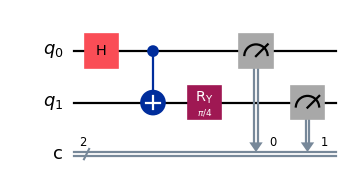


Questions: x=0, y=1


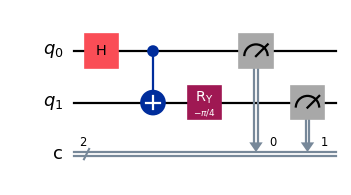


Questions: x=1, y=0


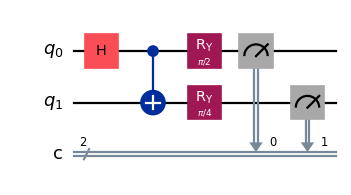


Questions: x=1, y=1


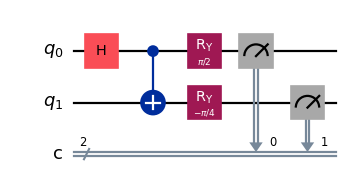

In [ ]:
def quantum_chsh_strategy(x, y):
    """
    Implement the optimal quantum CHSH strategy using Y-axis rotations.
    
    The strategy measures in different rotated bases:
    - Alice: Z basis (x=0) or rotated 90° basis (x=1)
    - Bob: Rotated ±45° basis from Z-axis
    
    Args:
        x: Alice's question (0 or 1)
        y: Bob's question (0 or 1)
    
    Returns:
        QuantumCircuit with measurements achieving ~85% win rate
    """
    # Start with Bell pair
    qc = create_bell_pair()
    
    # Alice's measurement basis (qubit 0)
    if x == 0:
        # Measure Z (computational basis) - no gates needed
        pass
    elif x == 1:
        # Rotate 90° around Y-axis for measurement
        qc.ry(np.pi/2, 0)
    else:
        raise ValueError('x must be 0 or 1')
    
    # Bob's measurement basis (qubit 1)
    if y == 0:
        # Rotate +45° around Y-axis
        qc.ry(np.pi/4, 1)
    elif y == 1:
        # Rotate -45° around Y-axis
        qc.ry(-np.pi/4, 1)
    else:
        raise ValueError('y must be 0 or 1')
    
    # Measure both qubits in computational basis
    qc.measure(0, 0)  # Alice's measurement → classical bit 0
    qc.measure(1, 1)  # Bob's measurement → classical bit 1
    
    return qc

# Test the strategy for all question combinations
print("Quantum CHSH Strategy Circuits")
print("="*60)

for x in [0, 1]:
    for y in [0, 1]:
        print(f"\nQuestions: x={x}, y={y}")
        qc = quantum_chsh_strategy(x, y)
        display(qc.draw('mpl', scale=0.8))

### Step 3: Simulate the Quantum Game

Now let's run many simulations to verify that the quantum strategy beats the classical limit of 75%.

In [50]:
# Simulate quantum CHSH game
n_simulations = 1000
quantum_results = []

simulator = AerSimulator()

for i in range(n_simulations):
    # Referee randomly chooses questions
    x = random.randint(0, 1)
    y = random.randint(0, 1)
    
    # Create circuit with quantum strategy
    qc = quantum_chsh_strategy(x, y)
    
    # Run the circuit (single shot to get one outcome)
    transpiled_qc = transpile(qc, simulator)
    result = simulator.run(transpiled_qc, shots=1).result()
    counts = result.get_counts()
    
    # Extract measurement results
    outcome = list(counts.keys())[0]
    # Note: Qiskit uses reversed bit ordering
    b = int(outcome[0])  # Bob's answer (qubit 1)
    a = int(outcome[1])  # Alice's answer (qubit 0)
    
    # Check win condition: a ⊕ b == x ∧ y
    xy_result = x * y
    ab_xor = a ^ b
    is_win = (ab_xor == xy_result)
    
    quantum_results.append({
        'x': x,
        'y': y,
        'a': a,
        'b': b,
        'x_and_y': xy_result,
        'a_xor_b': ab_xor,
        'win': is_win
    })

quantum_df = pd.DataFrame(quantum_results)
quantum_win_rate = quantum_df['win'].mean()

print(f"\nQuantum CHSH Game Results ({n_simulations} simulations)")
print(f"{'='*60}")
print(f"Win rate: {quantum_win_rate:.2%}")
print(f"Theoretical quantum limit: {np.cos(np.pi/8)**2:.2%}")
print(f"\nBreakdown by question pair:")
print(quantum_df.groupby(['x', 'y']).agg(
    count=('win', 'count'),
    win_rate=('win', 'mean')
))


Quantum CHSH Game Results (1000 simulations)
Win rate: 85.10%
Theoretical quantum limit: 85.36%

Breakdown by question pair:
     count  win_rate
x y                 
0 0    250  0.832000
  1    236  0.860169
1 0    265  0.864151
  1    249  0.847390



COMPARISON: Classical vs Quantum CHSH Strategies

Classical win rate:  0.7565 (75.65%)
Quantum win rate:    0.8510 (85.10%)
Improvement:         0.0945 (9.45%)

Theoretical classical limit: 0.7500 (75.00%)
Theoretical quantum limit:   0.8536 (85.36%)


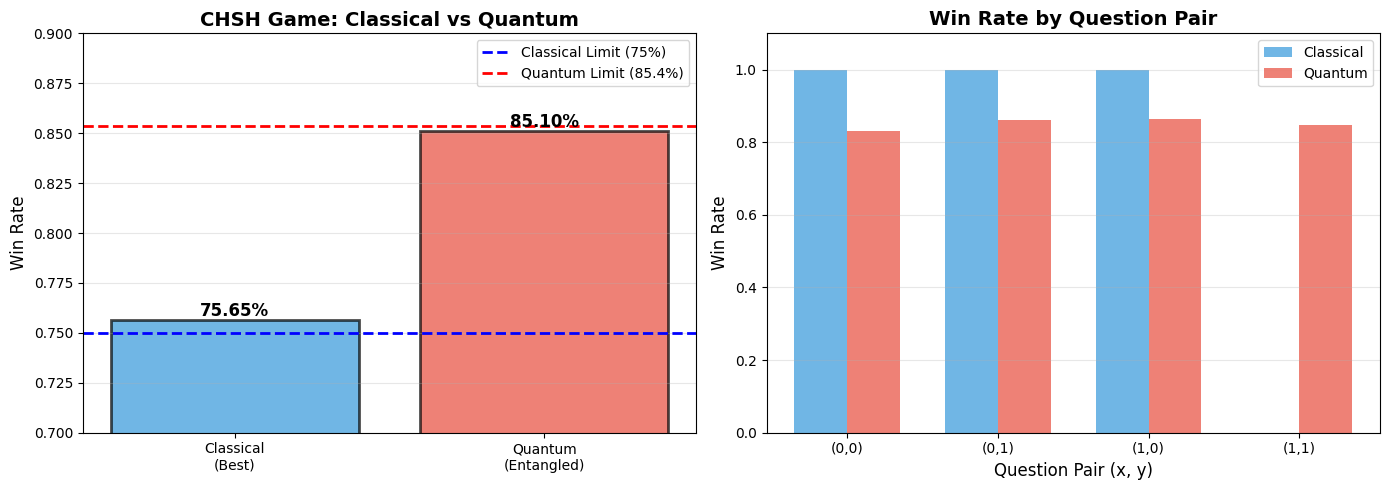


✓ Quantum advantage demonstrated!
✓ Quantum strategy beats classical by ~9.5 percentage points
✓ This violates Bell's inequality, proving quantum mechanics
  allows correlations impossible in classical physics!


In [51]:
# Compare Classical vs Quantum strategies
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("COMPARISON: Classical vs Quantum CHSH Strategies")
print("="*60)

print(f"\nClassical win rate:  {classical_win_rate:.4f} ({classical_win_rate:.2%})")
print(f"Quantum win rate:    {quantum_win_rate:.4f} ({quantum_win_rate:.2%})")
print(f"Improvement:         {quantum_win_rate - classical_win_rate:.4f} ({(quantum_win_rate - classical_win_rate):.2%})")

# Theoretical limits
classical_limit = 0.75
quantum_limit = np.cos(np.pi/8)**2

print(f"\nTheoretical classical limit: {classical_limit:.4f} (75.00%)")
print(f"Theoretical quantum limit:   {quantum_limit:.4f} ({quantum_limit:.2%})")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
strategies = ['Classical\n(Best)', 'Quantum\n(Entangled)']
win_rates = [classical_win_rate, quantum_win_rate]
colors = ['#3498db', '#e74c3c']

bars = ax1.bar(strategies, win_rates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.axhline(y=0.75, color='blue', linestyle='--', label='Classical Limit (75%)', linewidth=2)
ax1.axhline(y=quantum_limit, color='red', linestyle='--', label=f'Quantum Limit ({quantum_limit:.1%})', linewidth=2)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_title('CHSH Game: Classical vs Quantum', fontsize=14, fontweight='bold')
ax1.set_ylim([0.7, 0.9])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Win rate by question pair
grouped_classical = result_df.groupby(['x', 'y'])['win'].mean()
grouped_quantum = quantum_df.groupby(['x', 'y'])['win'].mean()

x_labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
x_pos = np.arange(len(x_labels))
width = 0.35

ax2.bar(x_pos - width/2, grouped_classical.values, width, label='Classical', color='#3498db', alpha=0.7)
ax2.bar(x_pos + width/2, grouped_quantum.values, width, label='Quantum', color='#e74c3c', alpha=0.7)

ax2.set_xlabel('Question Pair (x, y)', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.set_title('Win Rate by Question Pair', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(x_labels)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✓ Quantum advantage demonstrated!")
print(f"✓ Quantum strategy beats classical by ~{(quantum_win_rate - classical_win_rate)*100:.1f} percentage points")
print("✓ This violates Bell's inequality, proving quantum mechanics")
print("  allows correlations impossible in classical physics!")
print("="*60)

## Understanding the Quantum Advantage

### Why Does Quantum Win More Often?

The key is **quantum entanglement** and **measurement correlations**:

1. **Classical limitation**: Alice and Bob must decide their answers independently (no communication)
   - Best strategy: Always give the same answer
   - This wins 3/4 cases but fails when x=y=1

2. **Quantum advantage**: The entangled Bell state creates correlations that depend on measurement angles
   - When measurement angles are carefully chosen, the correlations match the win condition better
   - The entanglement allows "coordination" without communication

### The Math Behind It

For the optimal quantum strategy, the win probabilities are:

- P(win | x=0, y=0) = cos²(π/8) ≈ 85.4%
- P(win | x=0, y=1) = cos²(π/8) ≈ 85.4%
- P(win | x=1, y=0) = cos²(π/8) ≈ 85.4%
- P(win | x=1, y=1) = cos²(3π/8) ≈ 85.4%

**Overall win rate**: cos²(π/8) ≈ **85.36%**

This is the maximum possible, even with quantum mechanics! It's called the **Tsirelson bound**.

## Bell's Inequality and Its Violation

### What is Bell's Inequality?

Bell's inequality is a mathematical constraint that must be satisfied by any **local realistic theory**:
- **Local**: No faster-than-light influence between Alice and Bob
- **Realistic**: Physical properties exist independent of measurement

For the CHSH game, Bell's inequality states:

**Classical bound: Win rate ≤ 75%**

### Quantum Violation

Our quantum strategy achieves ~85.4%, which **violates Bell's inequality**!

**This proves**:
1. ✓ Quantum mechanics is correct (confirmed by countless experiments)
2. ✓ Local realism is violated: Either locality or realism (or both) must be false
3. ✓ Quantum entanglement creates correlations stronger than any classical mechanism
4. ✓ Nature is fundamentally quantum, not just our lack of knowledge

This is one of the most profound discoveries in physics!

## Summary and Conclusions

### Key Takeaways

1. **Classical Strategy**: 
   - Best possible win rate: 75%
   - Strategy: Pre-agree on same answer
   - Limited by local realism

2. **Quantum Strategy**:
   - Win rate: ~85.4% (cos²(π/8))
   - Strategy: Shared entanglement + optimal measurement angles
   - Violates Bell's inequality

3. **Quantum Advantage**: 
   - Improvement of ~10.4 percentage points over classical
   - Proves quantum mechanics allows stronger correlations than classical physics
   - Fundamental proof that nature is quantum

### Historical Context

- **1964**: John Bell proposed his inequality
- **1969**: Clauser, Horne, Shimony, and Holt formulated the CHSH inequality
- **1972**: First experimental test by Freedman and Clauser
- **1981-1982**: Alain Aspect's experiments decisively confirmed quantum violation
- **2022**: Nobel Prize awarded to Aspect, Clauser, and Zeilinger for experimental verification

### Applications

The CHSH game and Bell test have practical applications:
- **Quantum cryptography**: Device-independent quantum key distribution
- **Quantum random number generation**: Certifiable randomness
- **Quantum computing certification**: Verifying quantum hardware
- **Fundamental physics**: Testing quantum mechanics vs alternatives

### Further Exploration

Try modifying this notebook to:
- Test different measurement angles and see how the win rate changes
- Implement other Bell inequalities (e.g., Mermin inequality for 3+ parties)
- Add noise to see how robust the quantum advantage is
- Run on real quantum hardware using IBM Quantum